# PROJETO FINAL DE MACHINE LEARNING II

### Objetivos: 
Com o ferramental em análise e em ciência de dados adquirido até o momento, a ideia
é, com este projeto, avaliar um dataset sob três óptica:

1. Uma análise exploratória de dados; 
2. Uma análise de segmentação;
3. Uma análise preditiva.

In [2]:
import kagglehub

# Essa porção do código baixa diretamente a base de dados para o cache do usuário
# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\filip\.cache\kagglehub\datasets\shivam2503\diamonds\versions\1


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path+'/diamonds.csv')

| **Característica** | **Descrição** |
|---------------------|---------------|
| `x`                | Comprimento (mm) |
| `y`                | Largura (mm)     |
| `z`                | Profundidade (mm) |
| `carat`            | Peso em quilates do diamante |
| `cut`              | Qualidade do corte do diamante. Qualidade em ordem crescente: Fair (Regular), Good (Bom), Very Good (Muito Bom), Premium, Ideal |
| `color`            | Cor do diamante, sendo D a melhor e J a pior |
| `clarity`          | Quão visíveis são as inclusões no diamante (em ordem da melhor para a pior): FL = impecável, IF, I1, I2, I3 (nível 3 de inclusões) |
| `depth`            | Profundidade %: A altura de um diamante, medida da base (culet) até a mesa, dividida pelo diâmetro médio da cintura |
| `table`            | Tabela %: A largura da mesa do diamante expressa como uma porcentagem do seu diâmetro médio |
| `price`            | O preço do diamante |


In [5]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


A coluna Unnamed parece ser um índice

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


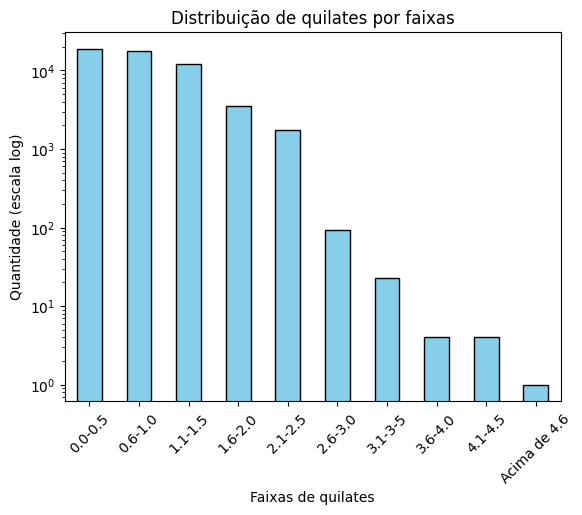

In [7]:
# Definir os bins e labels
bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 6.0]  # Adjust these ranges as needed
labels = ['0.0-0.5', '0.6-1.0', '1.1-1.5', '1.6-2.0', '2.1-2.5', '2.6-3.0', '3.1-3-5', '3.6-4.0', '4.1-4.5', 'Acima de 4.6']

# Categoriza os quilates nos bis definidos
df['carat range'] = pd.cut(df['carat'], bins=bins, labels=labels)

# Conta a ocorrência de quilates em cada faixa e plota
carat_counts = df['carat range'].value_counts().sort_index()
carat_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribuição de quilates por faixas')
plt.yscale('log')
plt.xlabel('Faixas de quilates')
plt.ylabel('Quantidade (escala log)')
plt.xticks(rotation=45)
plt.show()

In [8]:
df[df['carat'] > 3.5].sort_values('carat')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,carat range
27679,27680,3.51,Premium,J,VS2,62.5,59.0,18701,9.66,9.63,6.03,3.6-4.0
23644,23645,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,3.6-4.0
26534,26535,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13,3.6-4.0
26444,26445,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,3.6-4.0
25999,26000,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,4.1-4.5
25998,25999,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,4.1-4.5
27130,27131,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43,4.1-4.5
27630,27631,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72,4.1-4.5
27415,27416,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,Acima de 4.6


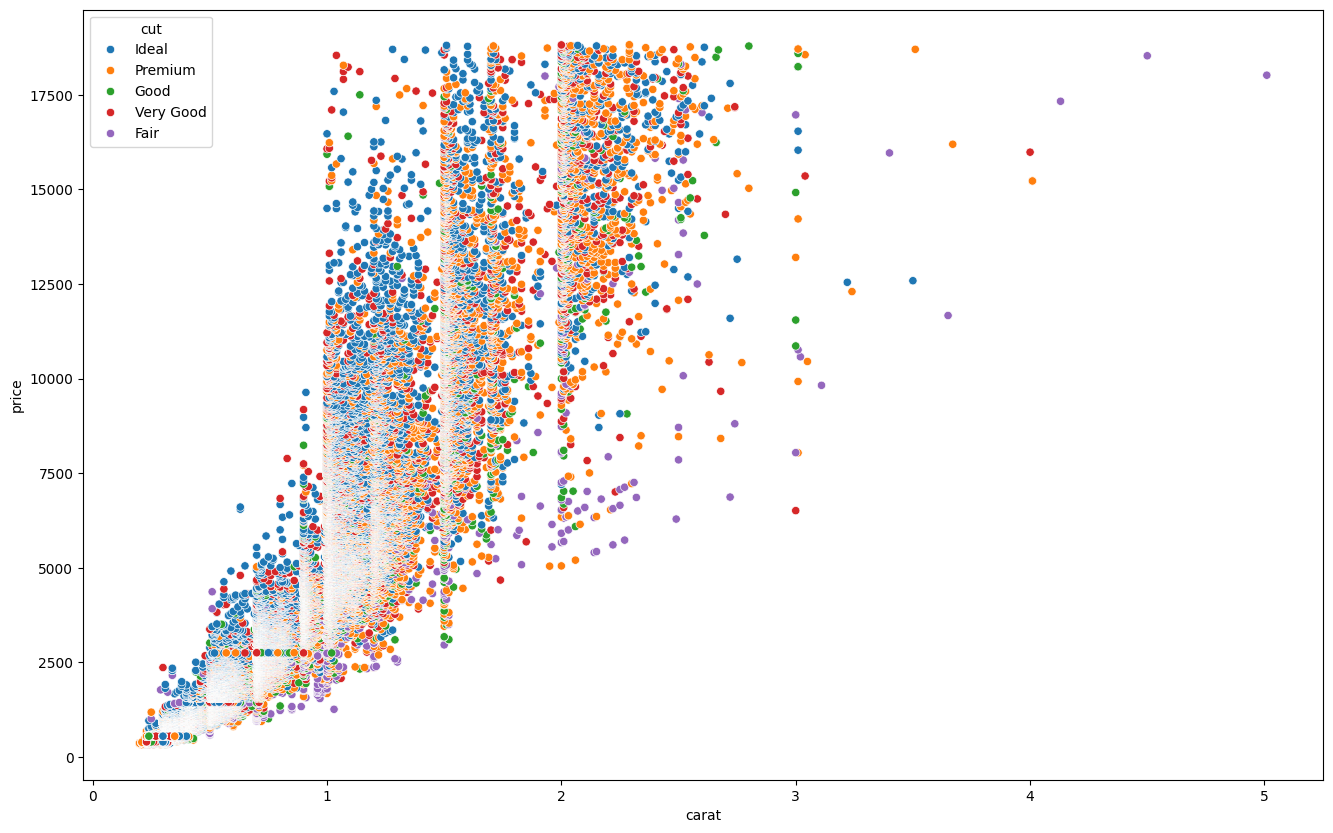

In [12]:
plt.figure(figsize=(16,10))
sns.scatterplot(df, x='carat', y='price', hue='cut')
plt.show()